In [111]:
import pandas as pd
import numpy as np
from openpyxl import Workbook as wb

In [112]:
SEs = pd.read_csv("data/RTV - Standards Evaluation - Learning_WIDE.csv")

In [170]:
SEs.head(2)

,SubmissionDate,starttime,endtime,text_audit,ev_date,district_0,enumerator,cluster_0,village_0,ev_month,...,Post harvest handling,Agric Compliance,Latrine present,WASH Compliance,Livestock Compliance,Overall Compliance,NPS Classified,VSLACommitte,Agric Champions,WASH Champions
0,22/05/2024 07:12,22/05/2024 06:16,22/05/2024 07:12,https://rtvuganda.surveycto.com/view/submissio...,22/05/2024,Rubirizi,Saturday Seezi,Kirugu,Kafuro_1A,6,...,1.0,0.714286,1,1.0,1.0,0.928571,Passive,Detractor,Detractor,Detractor
1,23/05/2024 17:30,23/05/2024 14:17,23/05/2024 16:59,https://rtvuganda.surveycto.com/view/submissio...,23/05/2024,Kitagwenda,Catherine_Kyasiimire,Ruhunga,Kanduru,6,...,1.0,0.857143,1,1.0,0.4,0.814286,Promoter,Promoter,Promoter,Promoter


In [114]:
SEs['Drying Method Num'] = SEs[['drying_method_1','drying_method_2','drying_method_3']].sum(axis = 1)

In [172]:
SEs['Drying Method Num'].head(1)

0    3
Name: Drying Method Num, dtype: int64

In [115]:
SEs['Water control Practice'] = np.where(SEs['water_mgt_methods_num'] > 1, 1,0)
SEs['Soil Management Practice'] = np.where(SEs['soil_mgt_methods_num'] > 2, 1,0)
SEs['KAP Livestock'] = np.where(SEs['kap_livestock_num'] > 4, 1,0)
SEs['KAP Agriculture'] = np.where(SEs['kap_farm_practices_num'] > 4, 1,0)
SEs['3 Composts'] = np.where(SEs['composts_num'] > 2, 1,0)
SEs['Vegetable gardening Practices'] = np.where(SEs['vegetable_farm_mode_num'] > 0, 1,0)
SEs['Drying Method'] = np.where(SEs['Drying Method Num'] > 1,1,0)

In [116]:
SEs[['Water control Practice', 'Soil Management Practice', 
     'Vegetable gardening Practices', 'KAP Livestock', 'KAP Agriculture', '3 Composts']].head(1)

,Water control Practice,Soil Management Practice,Vegetable gardening Practices,KAP Livestock,KAP Agriculture,3 Composts
0,1,0,1,0,0,1


In [139]:
SEs['Compost Compliance'] =  SEs[['3 Composts', 'composts_standard', 'forms_non_bio',
                                  'composts_free_runoff', 'composts_manure_usuage']].mean(axis = 1)

In [140]:
SEs['Post harvest handling'] = SEs[['Drying Method', 'sorting_grading_done', 
                                     'post_harvest_sys_present']].mean(axis = 1)

In [141]:
SEs['Agric Compliance'] = SEs[['Compost Compliance', 'Post harvest handling', 'Water control Practice',
                               'Soil Management Practice', 'Vegetable gardening Practices', 
                               'hh_apply_lq_manure', 'hh_organic_pesticides']].mean(axis = 1)

In [142]:
SEs['Latrine present'] = np.where(SEs['latrine_present'] == 'Yes', 1,0)

In [143]:
WASH = ['Latrine present', 'latrine_cover_present', 'latrine_floor_sealed',
                              'latrine_door_present', 'latrine_walls_sealed', 'latrine_roofleak_proof',
                              'latrine_environ_free_debris', 'latri_environ_free_feaces', 'tippy_tap_present',
                              'tippy_fill_water', 'soap_ash_present', 'tippy_tap_wet_area', 'cloth_hangline',
                              'kitchen_present', 'kitchen_ventilated', 'kitchen_clean', 'bathroom_present',
                              'bath_drainage_present', 'bathroom_clean', 'compound_clean', 'double_dishrack',
                              'non_bio_waste_properly_sorted']

In [144]:
SEs[WASH] = SEs[WASH].apply(pd.to_numeric, errors='coerce')

In [145]:
SEs['WASH Compliance'] = SEs[WASH].mean(axis = 1)

In [146]:
Livestock = ['gs_pen_constr', 'gs_pen_constr', 'gs_droppings_composted', 
             'pg_sty_constr', 'pg_sty_clean', 'pg_droppings_composted']

In [147]:
SEs['Livestock Compliance'] = SEs[Livestock].mean(axis = 1)

In [148]:
SEs['Overall Compliance'] = SEs[['Agric Compliance', 'WASH Compliance', 
                                 'Livestock Compliance', 'vlsa_membership']].mean(axis = 1)

In [149]:
SEs['NPS Classified'] = np.where(SEs['overall_nps'] < 7, 'Detractor', 
                                 np.where(SEs['overall_nps'] > 8, 'Promoter','Passive'))

In [162]:
NPS_table = SEs.groupby(['district_1', 'cluster_1', 'village_1'])['NPS Classified'].value_counts().unstack(fill_value=0)

NPS_table['Total'] = NPS_table.sum(axis=1)

NPS_table['Detractors(%)'] = (NPS_table['Detractor'] / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table['Passive'] / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table['Promoter'] / NPS_table['Total']) * 100

NPS_table['Overall NPS (%)'] = NPS_table['Promoters(%)'] - NPS_table['Detractors(%)']

NPS_table.to_excel('NPS.xlsx', index=False)

In [164]:
NPS_table = SEs.groupby(['district_1', 'cluster_1'])['NPS Classified'].value_counts().unstack(fill_value=0)

NPS_table['Total'] = NPS_table.sum(axis=1)

NPS_table['Detractors(%)'] = (NPS_table['Detractor'] / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table['Passive'] / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table['Promoter'] / NPS_table['Total']) * 100

NPS_table['Overall NPS (%)'] = NPS_table['Promoters(%)'] - NPS_table['Detractors(%)']

NPS_table.to_excel('NPSCluster.xlsx', index=False)

In [151]:
SEs['VSLACommitte'] = np.where(SEs['vlts_committee_score'] < 7, 'Detractor', 
                                 np.where(SEs['vlts_committee_score'] > 8, 'Promoter','Passive'))

In [166]:
NPS_table = SEs.groupby(['district_1', 'cluster_1', 'village_1'])['VSLACommitte'].value_counts().unstack(fill_value=0)

NPS_table['Total'] = NPS_table.sum(axis=1)

NPS_table['Detractors(%)'] = (NPS_table['Detractor'] / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table['Passive'] / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table['Promoter'] / NPS_table['Total']) * 100

NPS_table['Overall NPS VSLA (%)'] = NPS_table['Promoters(%)'] - NPS_table['Detractors(%)']

NPS_table.to_excel('VSLACommitte.xlsx', index=False)

In [153]:
SEs['Agric Champions'] = np.where(SEs[ 'agric_champion_score'] < 7, 'Detractor', 
                                 np.where(SEs[ 'agric_champion_score'] > 8, 'Promoter','Passive'))

In [167]:
NPS_table = SEs.groupby(['district_1', 'cluster_1', 'village_1'])['Agric Champions'].value_counts().unstack(fill_value=0)

NPS_table['Total'] = NPS_table.sum(axis=1)

NPS_table['Detractors(%)'] = (NPS_table['Detractor'] / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table['Passive'] / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table['Promoter'] / NPS_table['Total']) * 100

NPS_table['Overall NPS VSLA (%)'] = NPS_table['Promoters(%)'] - NPS_table['Detractors(%)']

NPS_table.to_excel('AgricChampion.xlsx', index=False)

In [155]:
SEs['WASH Champions'] = np.where(SEs['wash_champion_score'] < 7, 'Detractor', 
                                 np.where(SEs['wash_champion_score'] > 8, 'Promoter','Passive'))

In [168]:
NPS_table = SEs.groupby(['district_1', 'cluster_1', 'village_1'])['WASH Champions'].value_counts().unstack(fill_value=0)

NPS_table['Total'] = NPS_table.sum(axis=1)

NPS_table['Detractors(%)'] = (NPS_table['Detractor'] / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table['Passive'] / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table['Promoter'] / NPS_table['Total']) * 100

NPS_table['Overall NPS VSLA (%)'] = NPS_table['Promoters(%)'] - NPS_table['Detractors(%)']

NPS_table.to_excel('WASHChampion.xlsx', index=False)

In [157]:
Village_Scores = SEs.groupby(['district_1',  'cluster_1',  'village_1'])[['Overall Compliance', 'Agric Compliance', 'WASH Compliance', 
                            'Livestock Compliance', 'vlsa_membership', 'Compost Compliance', 
                            '3 Composts', 'composts_standard', 'forms_non_bio', 'composts_free_runoff', 
                            'compost_pit', 'composts_manure_usuage', 'Post harvest handling', 'Water control Practice',
                            'Soil Management Practice', 'Vegetable gardening Practices', 'hh_apply_lq_manure', 
                            'hh_organic_pesticides', 'Latrine present', 'latrine_cover_present', 'latrine_floor_sealed',
                              'latrine_door_present', 'latrine_walls_sealed', 'latrine_roofleak_proof',
                              'latrine_environ_free_debris', 'latri_environ_free_feaces', 'tippy_tap_present',
                              'tippy_fill_water', 'soap_ash_present', 'tippy_tap_wet_area', 'cloth_hangline',
                              'kitchen_present', 'kitchen_ventilated', 'kitchen_clean', 'bathroom_present',
                              'bath_drainage_present', 'bathroom_clean', 'compound_clean', 'double_dishrack',
                              'non_bio_waste_properly_sorted', 'gs_pen_constr', 'gs_pen_constr', 'gs_droppings_composted', 
                            'pg_sty_constr', 'pg_sty_clean', 'pg_droppings_composted', 'KAP Livestock', 
                            'KAP Agriculture']].mean(numeric_only = True).reset_index()

In [158]:
Village_Scores.to_excel('Village_Scores.xlsx', index = False)

In [159]:
Cluster_Scores = SEs.groupby(['district_1',  'cluster_1'])[['Overall Compliance','Agric Compliance', 'WASH Compliance', 
                            'Livestock Compliance', 'vlsa_membership', 'Compost Compliance', 
                            '3 Composts', 'composts_standard', 'forms_non_bio', 'composts_free_runoff', 
                            'composts_manure_usuage', 'Post harvest handling', 'Water control Practice',
                            'Soil Management Practice', 'Vegetable gardening Practices', 'hh_apply_lq_manure', 
                            'hh_organic_pesticides', 'Latrine present', 'latrine_cover_present', 'latrine_floor_sealed',
                              'latrine_door_present', 'latrine_walls_sealed', 'latrine_roofleak_proof',
                              'latrine_environ_free_debris', 'latri_environ_free_feaces', 'tippy_tap_present',
                              'tippy_fill_water', 'soap_ash_present', 'tippy_tap_wet_area', 'cloth_hangline',
                              'kitchen_present', 'kitchen_ventilated', 'kitchen_clean', 'bathroom_present',
                              'bath_drainage_present', 'bathroom_clean', 'compound_clean', 'double_dishrack',
                              'non_bio_waste_properly_sorted', 'gs_pen_constr', 'gs_pen_constr', 'gs_droppings_composted', 
                            'pg_sty_constr', 'pg_sty_clean', 'pg_droppings_composted', 'KAP Livestock', 
                            'KAP Agriculture']].mean(numeric_only = True).reset_index()

In [160]:
Cluster_Scores.to_excel('Cluster_Scores.xlsx', index = False)

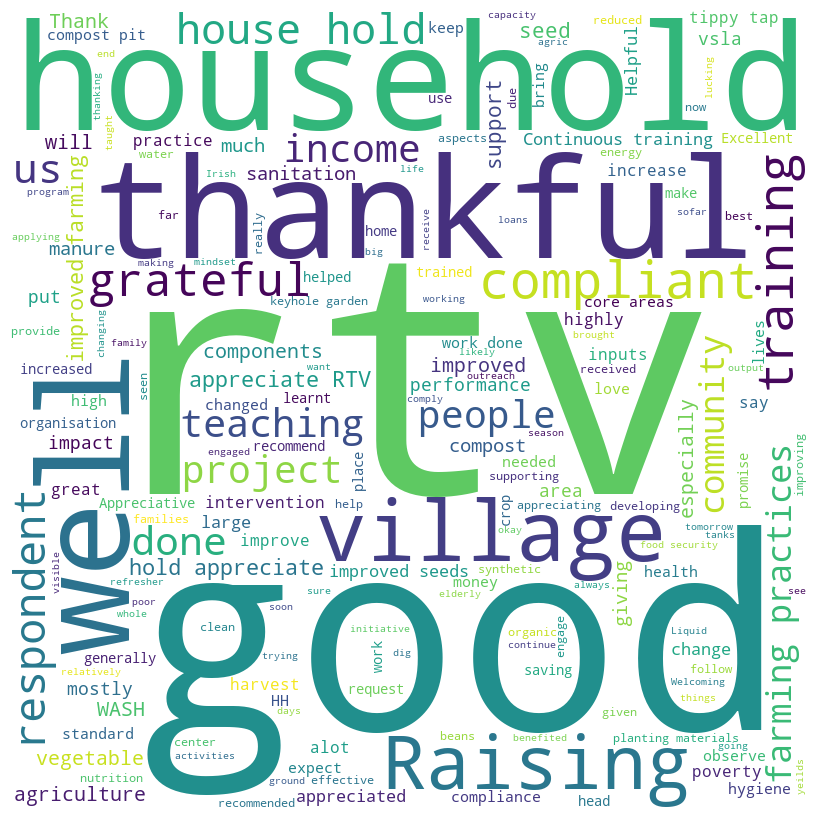

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(SEs['hh_comment'].dropna())

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()